In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # TensorFlow and tf.keras
# import tensorflow as tf
# from tensorflow import keras

# print(tf.__version__)

## 1. 讀入 Fashion MNIST 數據集

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

The labels are an array of integers, ranging from 0 to 9. <br>
Each image is mapped to a single label.

In [5]:
# 資料集沒有包含 class names要自己新增

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. 檢視資料

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# 28x28 pixel values

x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

這是 Dress


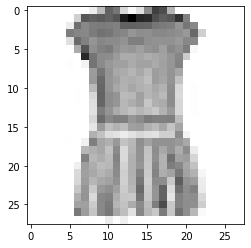

In [8]:
n = 3
print("這是", class_names[y_train[n]])
# plt.figure() # necessary when we want to manipulate the figure
plt.imshow(x_train[n], cmap='Greys')
# plt.show() # necessary when using terminal

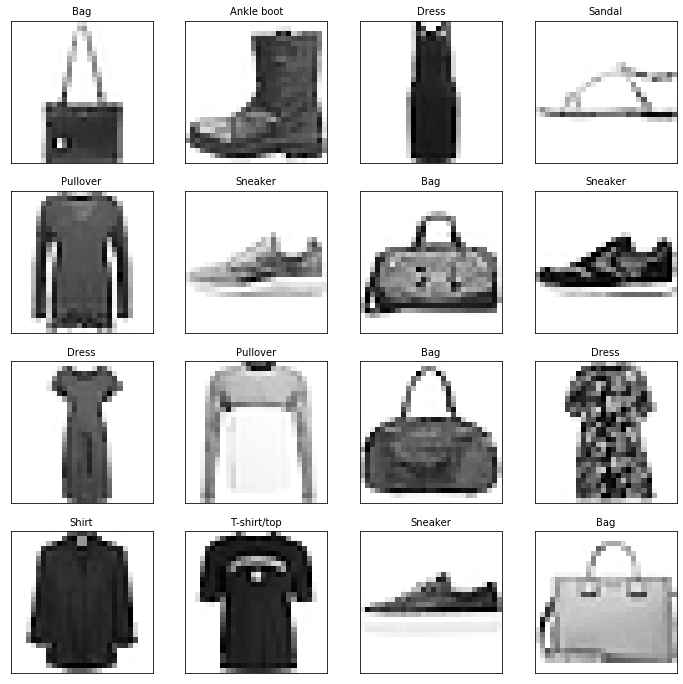

In [10]:
pick = np.random.choice(60000, 16, replace=False)

# adjust the size of display
plt.figure(figsize=(12, 12))

for i in range(16):
    n = pick[i]
    ax = plt.subplot(4, 4,1+i) # (row, col, index)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

## 3. 資料整理
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.

In [11]:
# scale the pixel values to a range of 0 to 1

x_train = x_train / 255
x_test = x_test / 255

In [12]:
# 28*28=784

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
# Converts a class vector (integers) to binary class matrix.
# `to_categorical` converts this into a matrix with as many
# columns as there are classes. The number of rows
# stays the same.
# 有10個class所以一個row會包含10個元素(10列)
# 即one-hot encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 4. 打造神經網路

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

The Sequential model is a linear stack of layers. <br>
https://keras.io/getting-started/sequential-model-guide/

In [16]:
model = Sequential()

In [17]:
model.add(Dense(64, input_dim=784, activation='relu'))

In [18]:
model.add(Dense(64, activation='relu'))

In [19]:
# softmax把值轉為0到1之間的機率
# 10表示10個classes
model.add(Dense(10, activation='softmax'))

In [20]:
# For a multi-class classification problem
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [21]:
model.summary()

# 784*64+64=100480

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## 4. 訓練

In [22]:
# batch_size: 一次拿多少資料訓練
# epochs: iterations on a dataset 

model.fit(x_train, y_train,  batch_size=100, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.5775 - accuracy: 0.7939
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4019 - accuracy: 0.8543
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3624 - accuracy: 0.8665
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3360 - accuracy: 0.8754
Epoch 5/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3185 - accuracy: 0.8826
Epoch 6/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3043 - accuracy: 0.8880
Epoch 7/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2946 - accuracy: 0.8915
Epoch 8/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2827 - accuracy: 0.8959
Epoch 9/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2743 - accuracy: 0.8981
Epoch 10/10
60

## 5. 結果

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3468 - accuracy: 0.8791

Test accuracy: 0.8791


In [24]:
# predict will return you: 0.6 A and 0.2 B
predictions = model.predict(x_test)

# predict_class will return you A
predicted_label = model.predict_classes(x_test)

In [44]:
predictions[5678]

array([6.9944440e-06, 1.2217289e-06, 5.4084268e-07, 9.9943870e-01,
       1.6804870e-05, 6.6998539e-11, 5.2919734e-04, 3.1602568e-11,
       6.4433743e-06, 1.2340292e-11], dtype=float32)

神經網路預測: Sneaker
實際: Sneaker


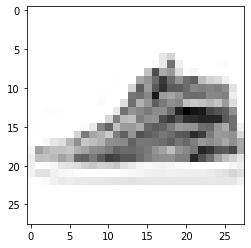

In [25]:
n = 8766

print('神經網路預測:', class_names[predicted_label[n]])
print('實際:', class_names[np.argmax(y_test[n])])

plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

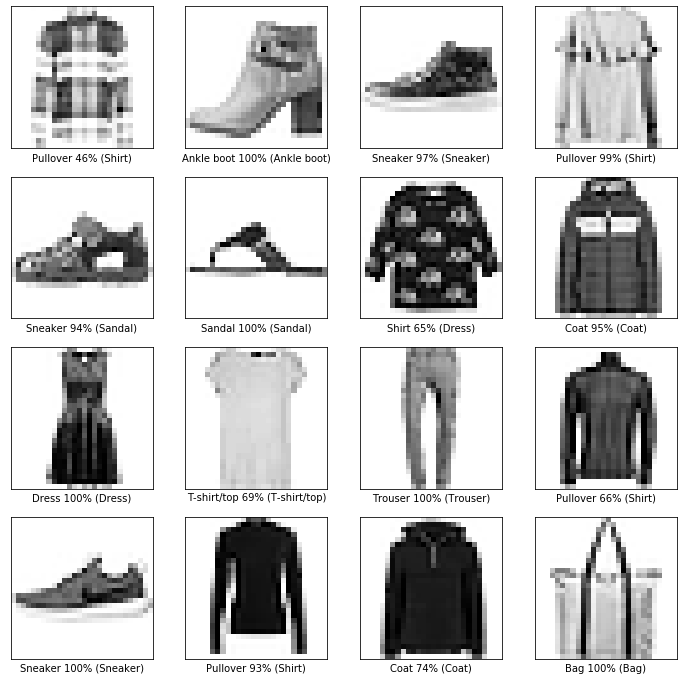

In [40]:
pick = np.random.choice(10000, 16, replace=False)

# adjust the size of display
plt.figure(figsize=(12, 12))

for i in range(16):
    n = pick[i]
    ax = plt.subplot(4, 4,1+i) # (row, col, index)
    ax.set_xticks([])
    ax.set_yticks([])
#     title = class_names[result[n]] + " (" + class_names[np.argmax(y_test[n])] + ")"
#     ax.set_title(title, fontsize=10)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys')  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label[n]], 
                                         100*np.max(predictions[n]), 
                                         class_names[np.argmax(y_test[n])]))